In [1]:
pip install newsapi-python

# Top Business News from yesterday - Sentiment Analysis

In [2]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
pd.set_option('display.max_colwidth',1000)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#['war', ' nifty50', ' fed rate hike', ' israel', ' oil', ' gold']
# war, nifty50, fed rate hike, israel, oil, gold prices, bonds

In [3]:
from newsapi import NewsApiClient
from datetime import datetime,date, timedelta
import json

# user_input = input(prompt = 'Enter the keywords you want to search separated by commas')
user_input = ''
if user_input == '':
  phrases = ['war', ' nifty50', ' fed rate hike', ' israel', ' oil', ' gold prices','affect the stock market']
else:
  phrases = user_input.split(',')
  print(phrases)
newsapi = NewsApiClient(api_key='ENTER-YOUR-FREE-NEWSAPI-KEY-HERE')
my_date = date.today() - timedelta(days= 2)
article_list = []
for phrase in phrases:
  articles = newsapi.get_everything(q=phrase,
                                    from_param = my_date.isoformat(),
                                    language="en",
                                    sort_by="relevancy",
                                    page_size = 15)
  article_list.append(articles)

# Initialize a new list for aggregated 'articles'
aggregated_articles = []

# Parse the JSON objects
for json_data in article_list:
  aggregated_articles.extend(json.loads(json.dumps(json_data))['articles'])

# Create a new JSON object with the aggregated data
aggregated_json = {
    'status': 'ok',
    'totalResults': len(aggregated_articles),
    'articles': aggregated_articles
}

print('found {} articles \n'.format(aggregated_json['totalResults']))
for article in aggregated_json['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])

found 88 articles 

Israel-Gaza war: Ceasefire would allow Hamas to regroup, says Blinken | 2023-11-04T20:10:18Z | https://www.bbc.co.uk/news/world-middle-east-67320520
A video shows the IDF's elite helicopter search and rescue unit evacuating some of Israel's 260 soldiers wounded battling Hamas in Gaza | 2023-11-04T14:44:35Z | https://www.businessinsider.com/video-idf-search-rescue-evacuate-260-injured-soldiers-gaza-2023-11
This Cheap Hacking Device Can Crash Your iPhone With Pop-Ups | 2023-11-04T13:00:00Z | https://www.wired.com/story/flipper-zero-iphone-dos-attack-security-roundup/
12 Journalists Killed This Week In Israel-Hamas War, Totaling 36 Deaths | 2023-11-04T00:48:37Z | https://www.huffpost.com/entry/journalists-killed-israel-gaza-war-total-36_n_65457e7ce4b01b258583cdfa
The 3,000-year history of tunnel warfare shows how hard it's going to be for Israel to root out Hamas | 2023-11-04T12:36:01Z | https://www.businessinsider.com/tunnel-warfare-evolution-history-military-tactic-2

In [4]:
import time
import re
import requests
from bs4 import BeautifulSoup
date_sentiments = {}
date_sentiments_list = []
count = 0
for article in aggregated_json['articles']:
  try:
    print(count)
    url = requests.get(article['url'])
  except:
    continue
  # Parse the HTML content with BeautifulSoup
  soup = BeautifulSoup(url.text, 'html.parser')
  paragraphs = soup.find_all('p')
  article_content = '. '.join([x.text for x in paragraphs])
  # article_content = str(article['title']) + '. ' + str(article['description'])
  if len(re.split(',|.',article_content))>200:
    # print(article_content)
    sentiment = sia.polarity_scores(article_content)['compound']
    date_sentiments.setdefault(my_date, []).append(sentiment)
    date_sentiments_list.append((sentiment, article['url'], article['title'],article['description']))
    date_sentiments_l = sorted(date_sentiments_list, key = lambda tup: tup[0],reverse = True)
    sent_list = list(date_sentiments.values())[0]
  count+=1
  # time.sleep(1)
  #Return a dataframe with all sentiment scores and articles
news_df = pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


# Plot Sentiments

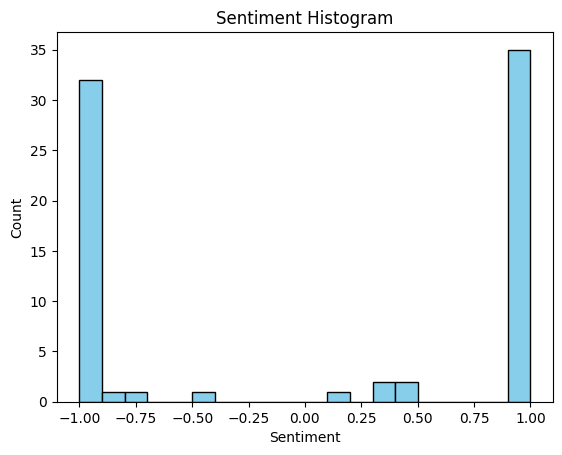

In [5]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'combined_df' with a 'Sentiment' column
sentiments = news_df[(news_df['Sentiment']<-0.1) | (news_df['Sentiment']>0.1)]['Sentiment']

# Create a histogram
plt.hist(sentiments, bins=20, range=(-1, 1), color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

In [6]:
print('POSITIVE : ',(sentiments > 0.1).sum())
print('NEGATIVE : ',(sentiments < -0.1).sum())

POSITIVE :  40
NEGATIVE :  35


In [7]:
# Create a new DataFrame with 'positive' and 'negative' columns
breakdown = pd.DataFrame()

# Create 'positive' column and fill it with True if Sentiment > 0, else fill with False
breakdown['positive'] = news_df[news_df['Sentiment'] > 0]['Title'].reset_index(drop=True)

# Create 'negative' column and fill it with True if Sentiment < 0, else fill with False
breakdown['negative'] = news_df[news_df['Sentiment'] < 0]['Title'].reset_index(drop=True)

# Print the new DataFrame
breakdown

,positive,negative
0,This Cheap Hacking Device Can Crash Your iPhone With Pop-Ups,"Israel-Gaza war: Ceasefire would allow Hamas to regroup, says Blinken"
1,"As YouTube Declares War on Ad Blockers, Google Sponsors Ad Blocking Conference",A video shows the IDF's elite helicopter search and rescue unit evacuating some of Israel's 260 soldiers wounded battling Hamas in Gaza
2,"World Of Warcraft's next three expansions have been announced, starting with The War Within","12 Journalists Killed This Week In Israel-Hamas War, Totaling 36 Deaths"
3,"US officials are concerned that Ukraine is running out of troops and have hinted at peace talks with Russia, report says","The 3,000-year history of tunnel warfare shows how hard it's going to be for Israel to root out Hamas"
4,YouTube’s war against ad blockers may have only granted them a temporary respite,"After losing 200 armored vehicles, Russia is now likely forcing its troops to advance on foot in its effort to take Avdiivka, Ukraine, UK says"
5,"World of Warcraft 'The War Within' has a $90 early access preorder bundle, and it's incredibly out of touch",Iranians Mark Anniversary of the 1979 U.S. Embassy Takeover and Call For a Gaza Ceasefire
6,Shriram Finance likely to replace UPL in Nifty50,Zelenskyy hosts EU official von der Leyen as Russian attacks wound at least 14 people
7,Over 50 smallcaps gain up to 39% as market bounces back,The UN is in disarray over the Israel-Hamas war
8,Markets regain positive momentum after 2 weeks in the red: Realty stocks outperform,The Fed Is Done Hiking – What Could Possibly Go Wrong?
9,Why the rich invest in real estate,The United States Has Its Fingerprints All Over the Chaos in Haiti


# Get Gift Nifty change % value - helps to determine Gap Up / Down

In [8]:
import requests
giftnifty_website = requests.get('https://giftnifty.org/').text

from bs4 import BeautifulSoup
# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(giftnifty_website, 'html.parser')

# Find the element with the class 'main-change' and extract the text
nifty_table = soup.find_all('table', class_='main-table')[0]

# Extract table data into a list
gn_table_data = []
for row in nifty_table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all('td')]
    gn_table_data.append(row_data)

# Remove the header row
gn_table_data = gn_table_data[1:]

# Create a DataFrame from the extracted data
gn_table = pd.DataFrame(gn_table_data)
print('GIFT NIFTY Change : {} \n\n'.format(gn_table.loc[:,2].values))
# gn_table

# Find the element with the class 'index-name' containing 'DOW 30'
international = soup.find('table', class_='index-table')
# Extract table data into a list
dow_table_data = []
for row in international.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all('td')]
    dow_table_data.append(row_data)

# Remove the header row

dow_table_data = dow_table_data[1:]

# Create a DataFrame from the extracted data
df = pd.DataFrame(dow_table_data)
df

GIFT NIFTY Change : ['+0.11%'] 




,0,1,2,3,4
0,DOW 30,"34,061.30",222.24,0.66%,
1,S&P 500,"4,358.34",40.56,0.94%,
2,NASDAQ COMPO,"13,478.30",184.09,1.38%,
3,FTSE 100,"7,417.73",-28.80,-0.39%,
4,DAX,"15,189.20",45.65,0.30%,
5,NIKKEI 225,"32,738.60",788.70,2.47%,
6,SHANGHAI COM,"3,047.04",16.24,0.54%,
7,NSE NIFTY,"19,230.60",97.35,0.51%,
